Shyam Kumar Ray Yadav (18449154)

Sonu Kumar (15651099)

Ahmad Raza Khawaja (25848862)

# Problem Sheet 5

## Exercise 5.1: basic 3d projection

The file ```points.npz``` contains 3d point data of the edges of the cube $[-1,1] ^3$. Our goal is to visualize this by using 2d plotting functions and our own implementation of mapping the 3d data to 2d data via parallel projection.

1. For angles $\theta \in [0, \pi]$, let $\varphi \in [0, 2\pi]$, let


$$ n^1= \begin{pmatrix} \sin(\theta) \cos(\varphi) \\ \sin(\theta) \sin(\varphi) \\ \cos(\theta) \end{pmatrix}$$


be the unit vector associated with $(\theta, \varphi)$ via polar coordinates. Write a function that for given $(\theta, \varphi)$ provides two additional unit vectors $n^2, n^3 \in \mathbb{R}^3$ such that $(n^1, n^2, n^3)$ form an orthonormal basis of $\mathbb{R}^3$ and such that $n^3$ is parallel to the $(z = 0)$-plane (i.e. the third component of $n^3$ is zero).


In [195]:
import numpy as np
import matplotlib.pyplot as plt


In [196]:
data = np.load('points.npz')
first_array = data[list(data.keys())[0]]
first_array

array([[-1.        ,  1.        , -1.        ],
       [-0.89473684,  1.        , -1.        ],
       [-0.78947368,  1.        , -1.        ],
       [-0.68421053,  1.        , -1.        ],
       [-0.57894737,  1.        , -1.        ],
       [-0.47368421,  1.        , -1.        ],
       [-0.36842105,  1.        , -1.        ],
       [-0.26315789,  1.        , -1.        ],
       [-0.15789474,  1.        , -1.        ],
       [-0.05263158,  1.        , -1.        ],
       [ 0.05263158,  1.        , -1.        ],
       [ 0.15789474,  1.        , -1.        ],
       [ 0.26315789,  1.        , -1.        ],
       [ 0.36842105,  1.        , -1.        ],
       [ 0.47368421,  1.        , -1.        ],
       [ 0.57894737,  1.        , -1.        ],
       [ 0.68421053,  1.        , -1.        ],
       [ 0.78947368,  1.        , -1.        ],
       [ 0.89473684,  1.        , -1.        ],
       [ 1.        ,  1.        , -1.        ],
       [-1.        , -1.        , -1.   

In [197]:
first_array.shape

(240, 3)

In [198]:
points = data['points'] #aasuming data are stored in the key:points
print(points.shape)

(240, 3)


In [199]:
#Function to compute the orthonormal basis.
def orthonormal_basis(theta, phi):
    n1 = np.array([np.sin(theta)* np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
    n3 = np.array([np.sin(phi), -np.cos(phi), 0])
    n2 = np.cross(n3, n1)
    return n1, n2, n3


2. Write a function that projects the 3d point data onto the plane spanned by (n2,n3) and shows the data as 2d scatter plot. For improved legibility, encode one of the original point coordinates additionally as color.

In [200]:
#Function to project the 3D points on 2D plane using the orthonal basis
def projection3D_to_2D(points, theta, phi):
    n1, n2, n3 = orthonormal_basis(theta, phi)
    projection_matrix =np.vstack((n2, n3)).T
    projected_2D = points @ projection_matrix
    return projected_2D, points

In [201]:
#Now, lets see the example for 45 degrees. 
theta = np.pi / 4
phi = np.pi / 3
projected_on_2D, original_3D = projection3D_to_2D(points, theta, phi)


In [202]:
#Function to plot 2d points with color encoding based on one of the original coordinates (Z-coordinate)
def plot2D(projection_on_2D, original_points, color_coord_index = 2 ):
    colors = original_points[:, color_coord_index]
    
    plt.figure(figsize = (12, 8))
    scatter = plt.scatter(projection_on_2D[:, 0], projection_on_2D[:, 1], c = colors, cmap = 'viridis', marker = 'o', alpha = 0.8)
    plt.colorbar(scatter, label = f'Original Coordinate {["X", "Y", "Z"][color_coord_index]}')
    plt.title('2D Parallel Projection of 3D Cube Edges')
    plt.xlabel('Component along n2')
    plt.ylabel('Component along n3')
    plt.grid(True)
    plt.show()

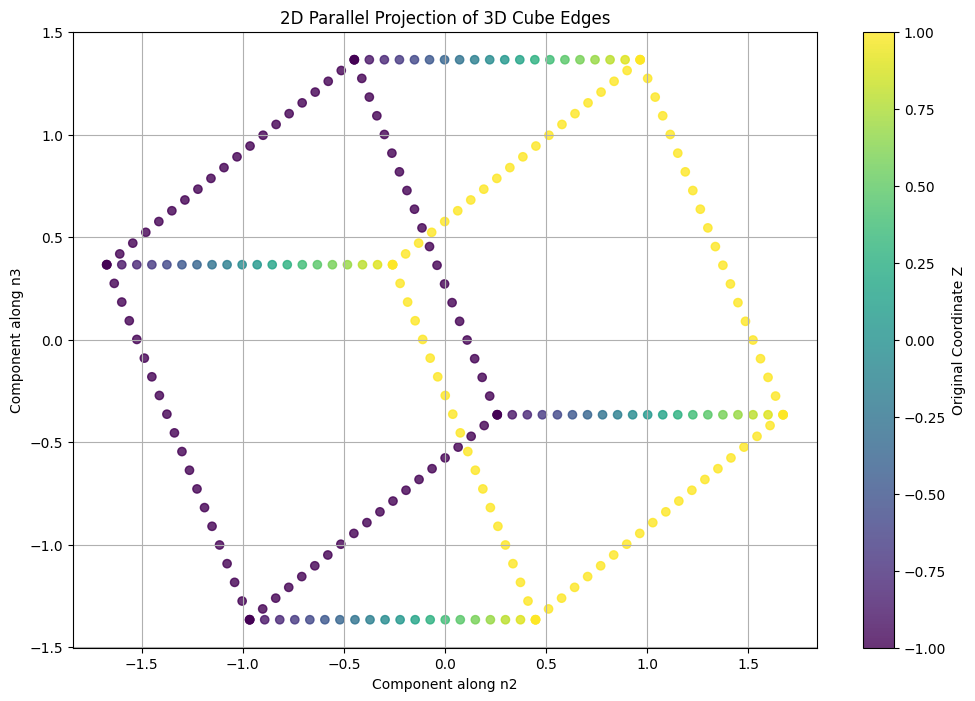

In [203]:
plot2D(projected_on_2D, original_3D, color_coord_index = 2)


3. Now create a sequence of plots that illustrate a quarter `rotation' around the cube, i.e. vary $\phi$ within $[0, \pi/2]$. The result will look best if $\theta$ is chosen between 0 and $\pi / 2$. It could look as shown in the question.

In [204]:
#Redefining the plotting code:
def plot_2d_points_with_color(projected_on_2d, original_3D, phi, color_coord_index=2):
    colors = original_3D[:, color_coord_index] 
    
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(projected_on_2d[:, 0], projected_on_2d[:, 1], c=colors, cmap='viridis', marker='o', alpha=0.8)
    plt.colorbar(scatter, label=f'Original Coordinate {["X", "Y", "Z"][color_coord_index]}')
    plt.title(f'2D Parallel Projection of 3D Cube Edges, $\\phi$ = {phi:.2f}')
    plt.xlabel('Component along n2')
    plt.ylabel('Component along n3')
    plt.grid(True)
    plt.show()

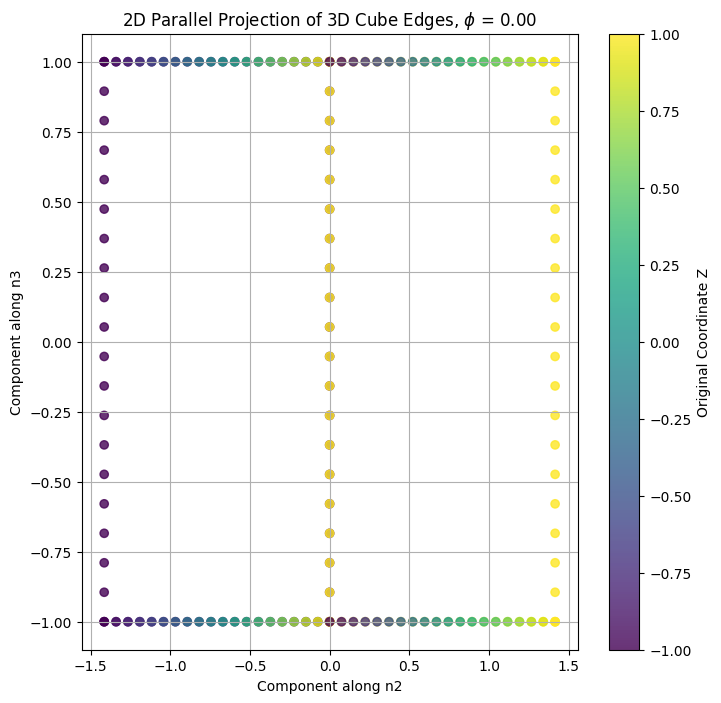

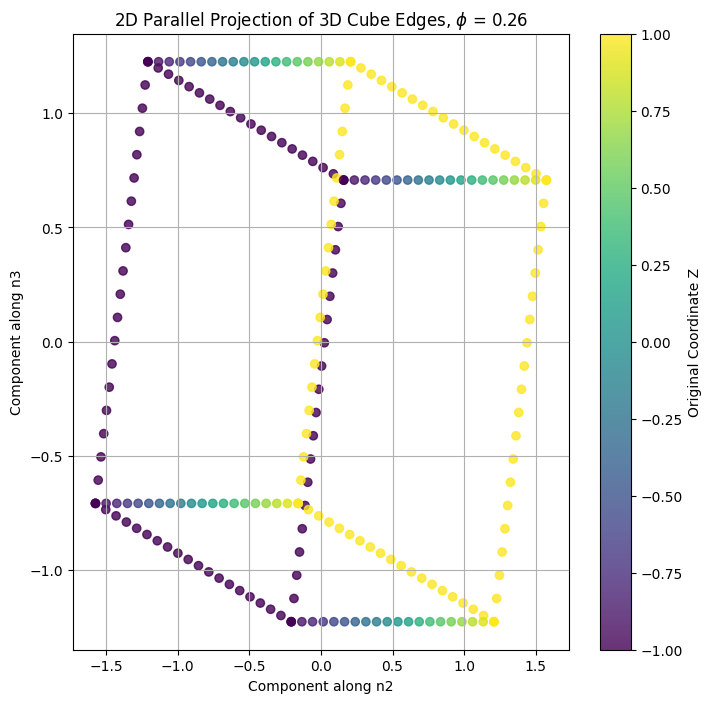

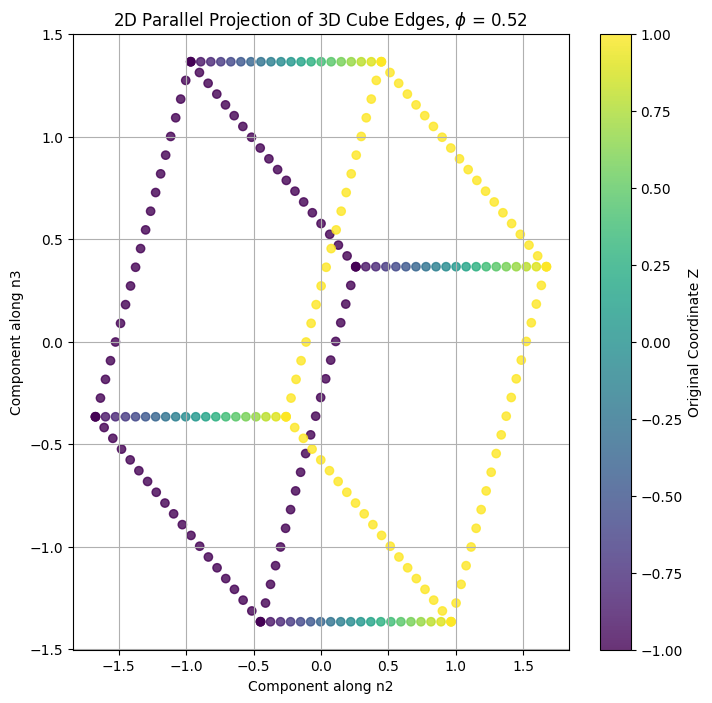

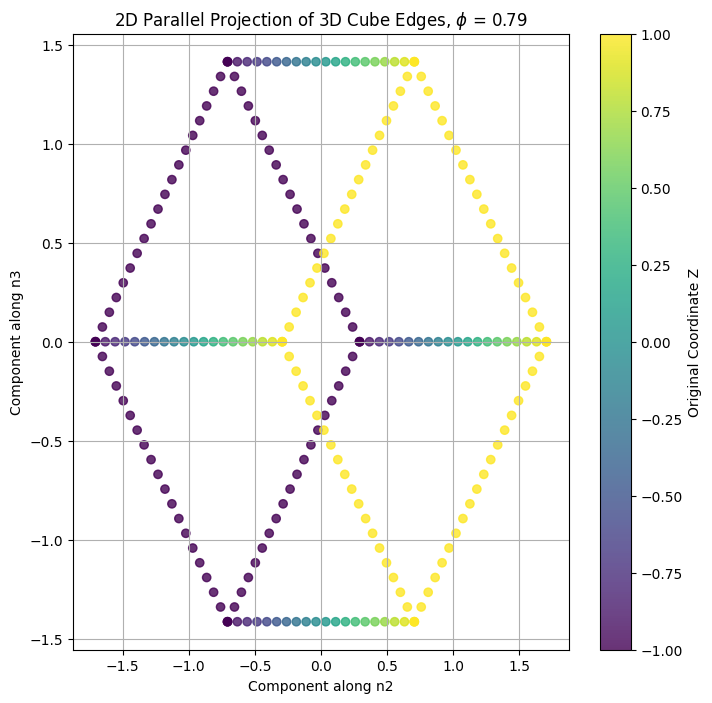

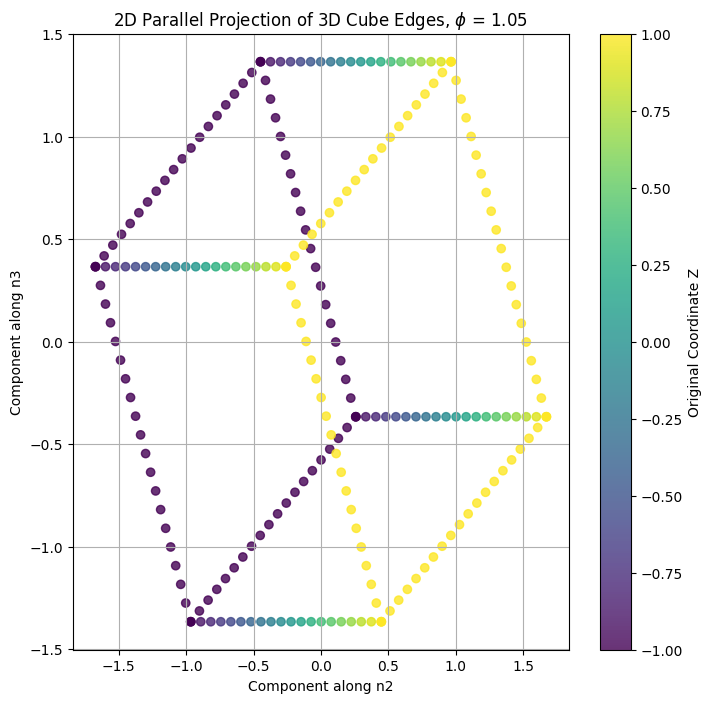

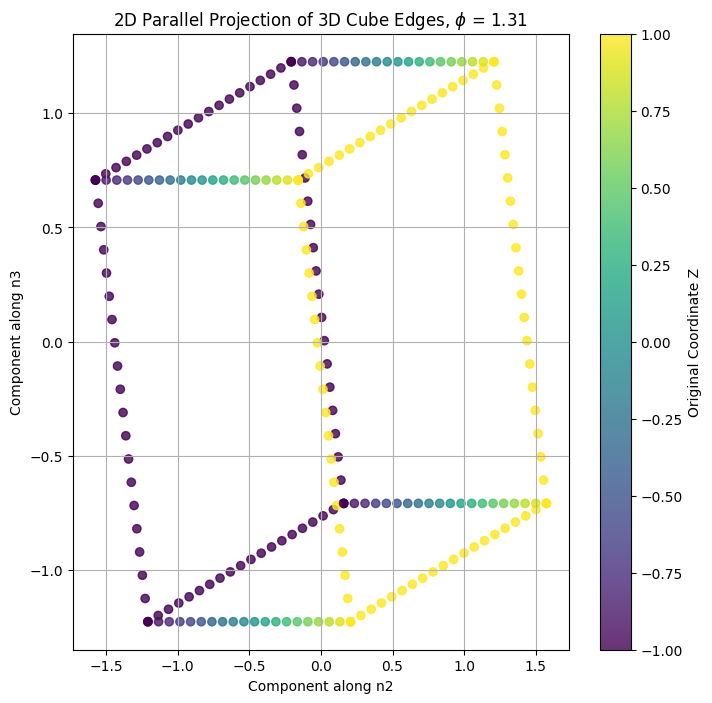

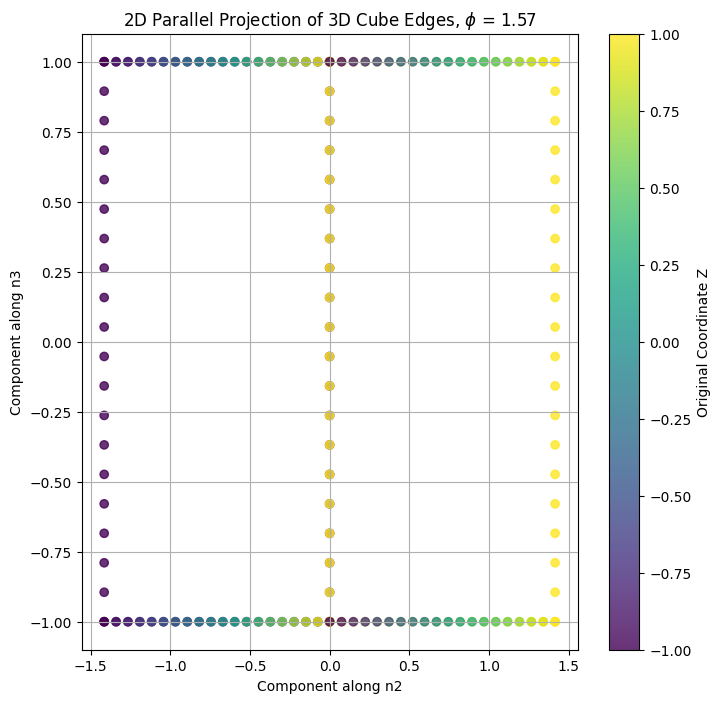

In [205]:
#redefining the parameters for the value of phi.
theta = np.pi / 4
phi_values = np.linspace(0, np.pi / 2, 7) #Generate the six values from 0 to pi/2

#Generate and display the plots for each value of phi
for phi in phi_values:
    projected_on_2D, original_3D = projection3D_to_2D(points, theta, phi)
    plot_2d_points_with_color(projected_on_2D, original_3D, phi, color_coord_index = 2)


4. In the above figures the overlap of different points is not consistent with their distance from the viewer, resulting in points that should be further from the viewer occluding nearer points. This can be fixed by using that ```plt.scatter``` draws points in the order that they appear in the arguments. For a point $x \in \mathbb{R}^3, x^Tn^1$ can be used as a notion of (reverse) depth. The larger this value, the closer a point is to the camera. Compute this value and then sort the points accordingly to fix this depth rendering issue.

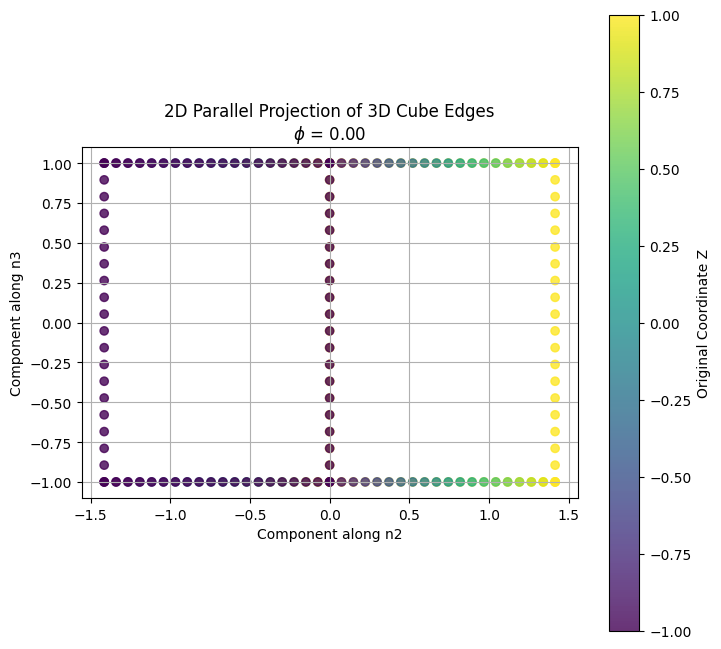

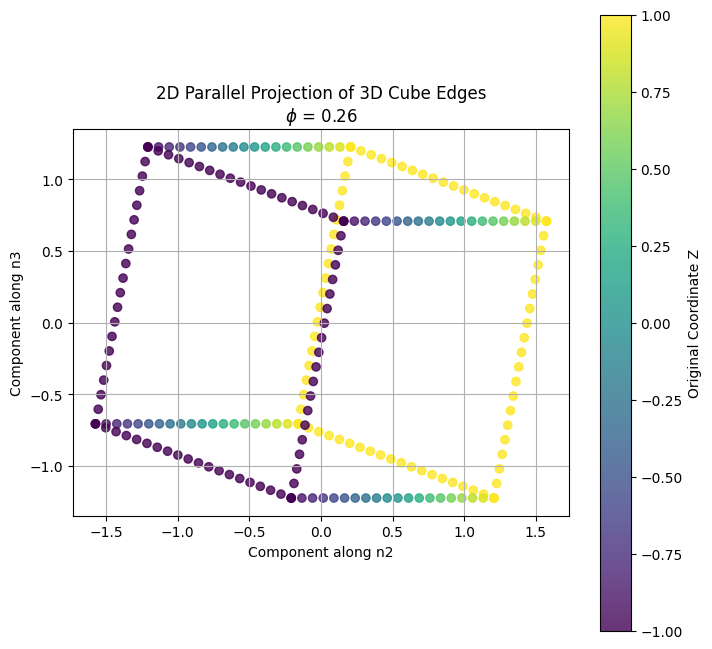

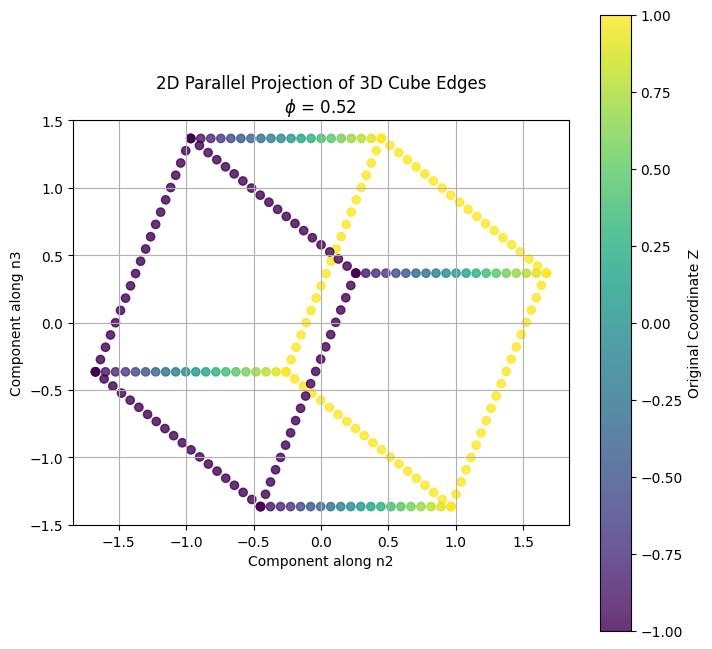

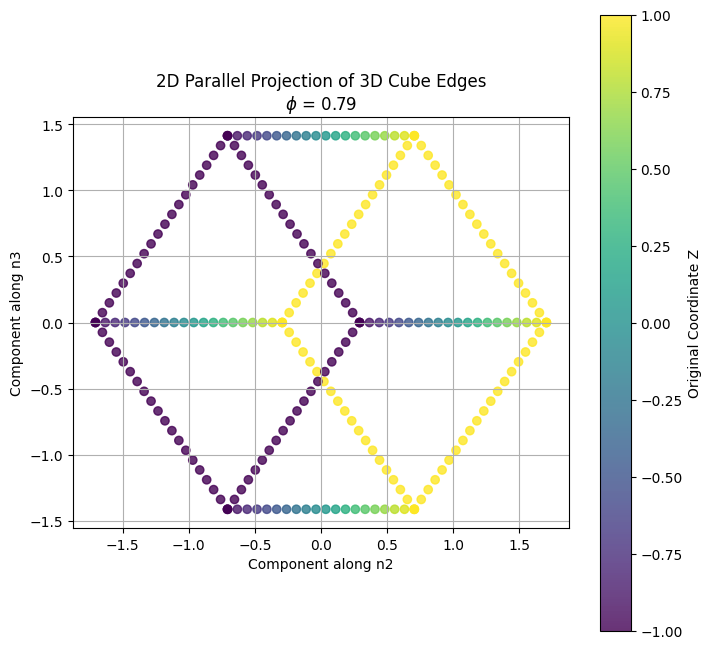

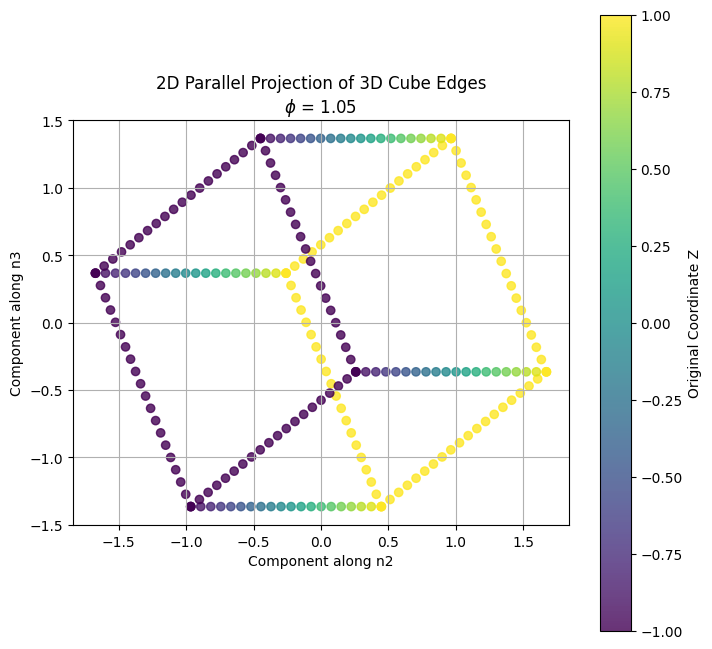

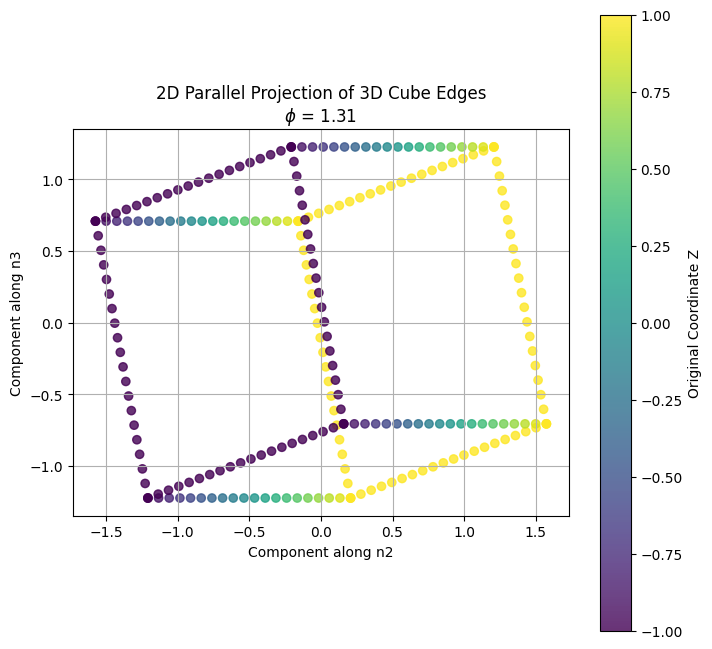

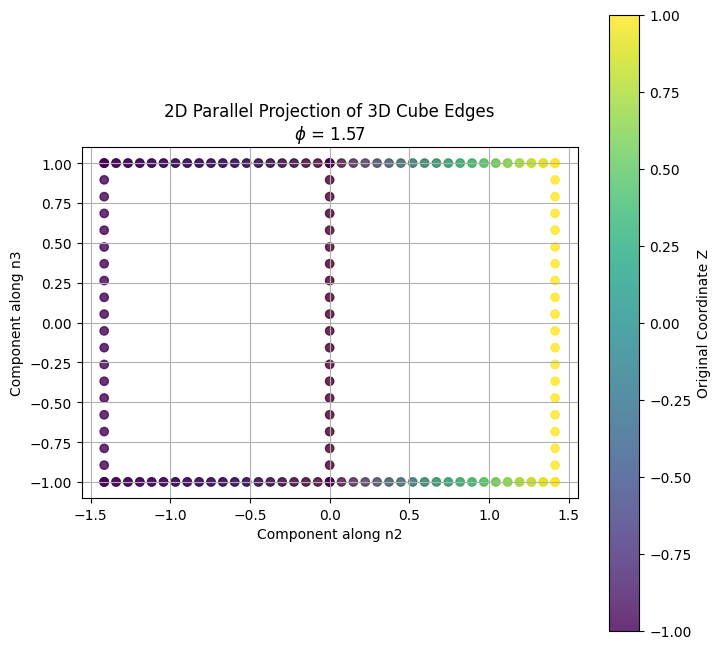

In [206]:
# Function to project 3D points onto the plane spanned by n2 and n3 and sort by depth
def parallel_projection_n2_n3(points, theta, phi):
    n1, n2, n3 = orthonormal_basis(theta, phi)
    P = np.vstack((n2, n3)).T  # Projection matrix using n2 and n3
    points_2d = points @ P
    depths = points @ n1  # Compute depth as dot product with n1
    sorted_indices = np.argsort(depths)[::-1]  # Sort by depth (reverse order)
    return points_2d[sorted_indices], points[sorted_indices], depths[sorted_indices]

# Function to plot 2D points with color encoding based on one of the original coordinates (e.g., Z-coordinate)
def plot_2d_points_with_color(points_2d, original_points, phi, depths, color_coord_index=2):
    colors = original_points[:, color_coord_index]
    
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(points_2d[:, 0], points_2d[:, 1], c=colors, cmap='viridis', marker='o', alpha=0.8)
    plt.colorbar(scatter, label=f'Original Coordinate {["X", "Y", "Z"][color_coord_index]}')
    plt.title(f'2D Parallel Projection of 3D Cube Edges\n$\\phi$ = {phi:.2f}')
    plt.xlabel('Component along n2')
    plt.ylabel('Component along n3')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Parameters
theta = np.pi / 4  # Example theta within the range [0, pi/2]
phi_values = np.linspace(0, np.pi / 2, 7)  # Generate 5 values for phi from 0 to pi/2

# Generate and display plots for each value of phi
for phi in phi_values:
    points_2d, original_points, depths = parallel_projection_n2_n3(points, theta, phi)
    plot_2d_points_with_color(points_2d, original_points, phi, depths, color_coord_index=2)